# Module 2 Model Evaluation


In [13]:
%matplotlib inline

## Accuracy

In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X,y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, stratify = y)

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
scores = clf.score(X_test, y_test) 
scores

0.95

In [16]:
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[20,  0,  0],
       [ 0, 19,  1],
       [ 0,  2, 18]])

In [19]:
cm.mean()

6.666666666666667

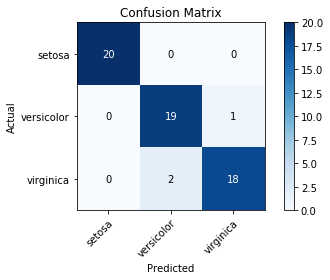

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap = 'Blues')

# We want to show all ticks...
ax.set_xticks(range(3))
ax.set_yticks(range(3))

# ... and label them with the respective list entries
ax.set_xticklabels(iris.target_names)
ax.set_yticklabels(iris.target_names)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(3):
    for j in range(3):
        color = 'w' if cm[i, j] > cm.mean() else 'k'
        ax.text(j, i, cm[i, j],
                ha="center", va="center", color=color)
plt.colorbar(im)

ax.set_title("Confusion Matrix")
fig.tight_layout()
plt.show()

## F1-score

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.90      0.95      0.93        20
           2       0.95      0.90      0.92        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [64]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average = 'micro')

0.9500000000000001

In [65]:
f1_score(y_test, y_pred, average = 'macro')

0.9499687304565354

In [66]:
f1_score(y_test, y_pred, average = 'weighted')

0.9499687304565353

In [67]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_pred, average = 'weighted'), recall_score(y_test, y_pred, average = 'weighted')

(0.9507101086048454, 0.95)

## ROC and AUC

In [131]:
X, y = X[y != 2], y[y != 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [132]:
# y_train

In [141]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

In [134]:
y_test

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [135]:
y_pred[1]

array([0., 1.])

In [136]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,y_pred[:, 1])

In [137]:
tpr

array([0., 1., 1.])

Text(0, 0.5, 'True Postiie Rate')

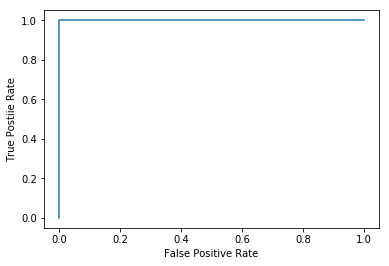

In [138]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Postiie Rate')

In [139]:
auc(fpr, tpr)

1.0

In [140]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred[:, 1])

1.0

## Cross Validation

In [96]:
X,y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [97]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores

array([1.        , 1.        , 1.        , 0.88888889, 0.9375    ])

In [98]:
scores.mean(), scores.std()

(0.9652777777777779, 0.04521894610027698)

## KFold Iterator

In [101]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [102]:
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [103]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 1